In [55]:


# Path to store stellar and instrument data.
ld_data_path = 'gj1243_new'

# Stellar models grid.
ld_model = 'phoenix'

# Metallicty [dex].
M_H = 0.1

# Effective temperature [K].
Teff = 3261

# Surface gravity [dex].
logg = 4.96237



In [56]:
from exotic_ld import StellarLimbDarkening



sld = StellarLimbDarkening(M_H, Teff, logg, ld_model, ld_data_path)

In [57]:
# Start and end of wavelength interval [angstroms].
wavelength_range = [6000., 10000.]

# Instrument mode.
mode = 'TESS'

u1, u2 = sld.compute_quadratic_ld_coeffs(wavelength_range, mode)

In [58]:
u1

0.20769685201728652

In [59]:
u2

0.38490262785547813

In [26]:
import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [27]:
sld2 = StellarLimbDarkening(M_H=0.0, Teff=3261, logg=4.96,
                           ld_model="phoenix",
                           ld_data_path="comprobacion",
                           interpolate_type="nearest",
                           verbose=2)



Input stellar parameters are M_H=0.0, Teff=3261, logg=4.96.
Loading stellar model from phoenix grid.
Using interpolation type = nearest.
Matched nearest with M_H=-0.0, Teff=3300.0, logg=5.0.


Downloaded comprobacion/phoenix/MH0.0/teff3300/logg5.0/phoenix_spectra.dat.
Stellar model loaded.


(54500,)
(78,)
(54500, 78)


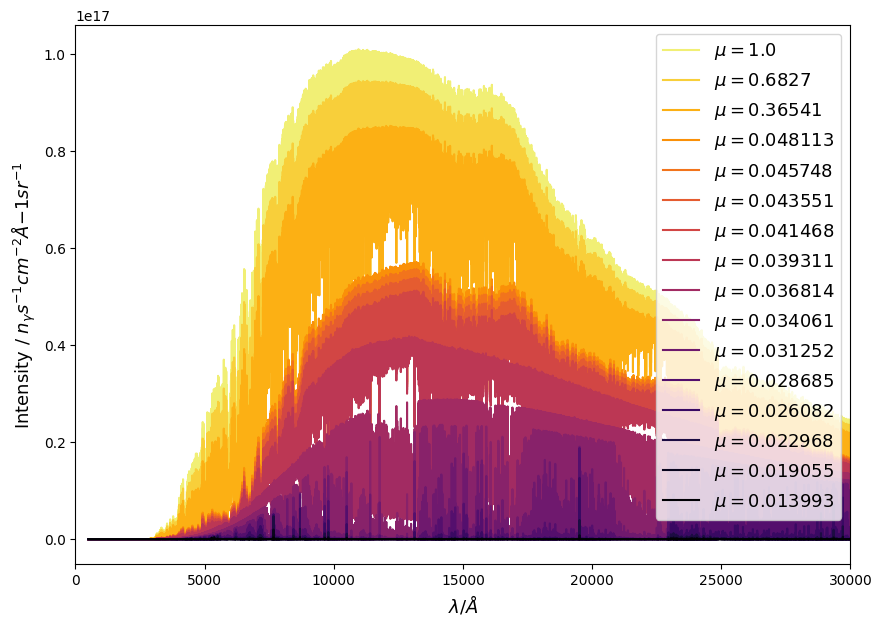

In [47]:
print(sld2.stellar_wavelengths.shape)
print(sld2.mus.shape)
print(sld2.stellar_intensities.shape)

plt.figure(figsize=(10, 7))
for mu_idx in np.arange(0, sld.mus.shape[0], 5):
    plt.plot(sld2.stellar_wavelengths, sld.stellar_intensities[:, mu_idx],
             color=cm.inferno(0.95 - mu_idx/sld2.mus.shape[0]), label="$\mu={}$".format(sld2.mus[mu_idx]))
plt.xlabel("$\lambda / \AA$", fontsize=13)
plt.ylabel("Intensity / $n_{\gamma} s^{-1} cm^{-2} \AA{-1} sr^{-1}$", fontsize=13)
plt.xlim(0, 3e4)
plt.legend(loc="upper right", fontsize=13)
plt.show()



In [48]:
us1 = sld.compute_quadratic_ld_coeffs(wavelength_range=[6000., 10000.],
                                                  mode="TESS",
                                                  mu_min=0.1)



In [49]:
us1

(0.20769685201728652, 0.38490262785547813)

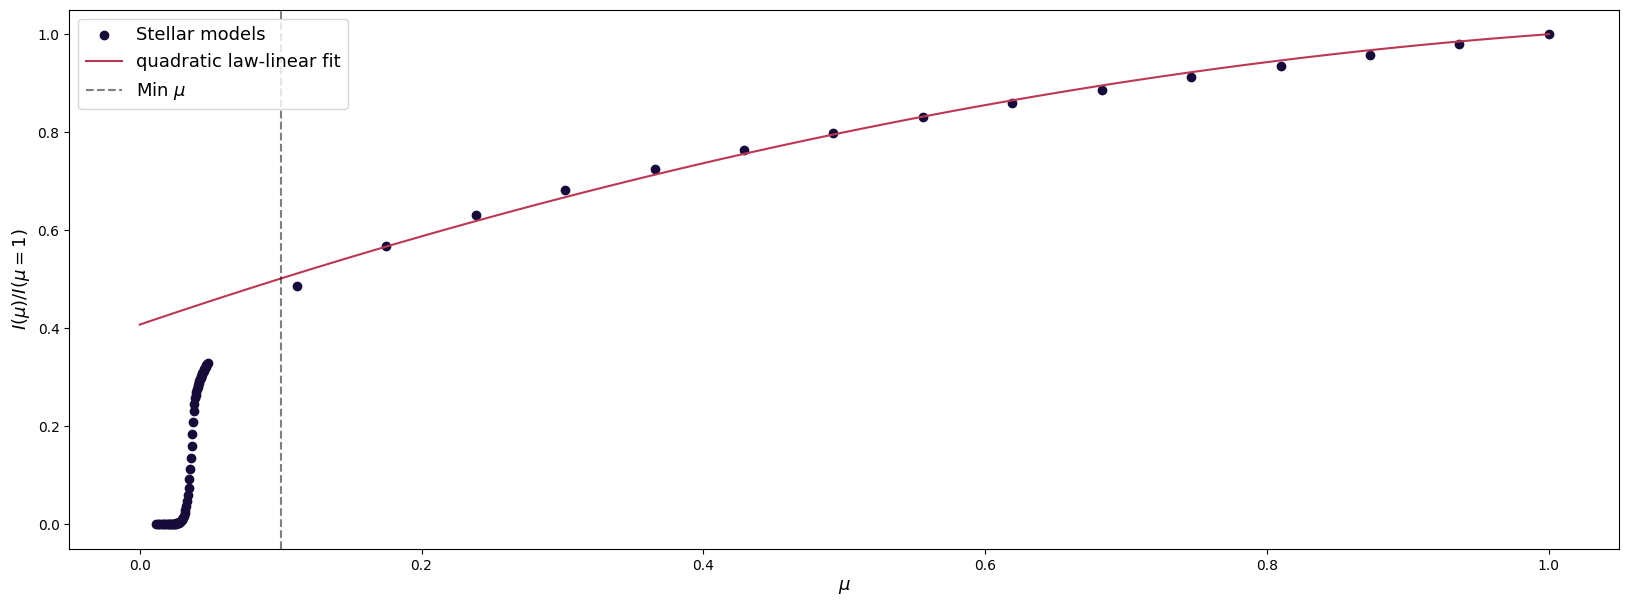

In [60]:
from exotic_ld.ld_laws import quadratic_ld_law
plt.figure(figsize=(20, 7))
plt.scatter(sld.mus, sld.I_mu, color=cm.inferno(0.1), label="Stellar models")
check_mus = np.linspace(0., 1., 100)
plt.plot(check_mus, quadratic_ld_law(check_mus, *us),
         color=cm.inferno(0.5), label="quadratic law-linear fit")
plt.axvline(0.1, ls="--", color=cm.inferno(0.), alpha=0.5, label="Min $\mu$")
plt.ylabel("$I(\mu) / I(\mu=1)$", fontsize=13)
plt.xlabel("$\mu$", fontsize=13)
plt.legend(loc="upper left", fontsize=13)
plt.show()


In [66]:
import numpy as np
from scipy.constants import h, c, k
from scipy.integrate import simps

# ----------------------------
# Planck function
# ----------------------------
def planck_lambda(wavelength, T):
    return (2*h*c**2 / wavelength**5) / \
        (np.exp(h*c / (wavelength*k*T)) - 1)

# ----------------------------
# Wavelength range: TESS
# ----------------------------
lam = np.linspace(6000e-10, 10000e-10, 20000)  # meters

# Temperatures
T_phot =3261   # K
T_spot = 2876.30   # K

# Fluxes
F_phot = simps(planck_lambda(lam, T_phot), lam)
F_spot = simps(planck_lambda(lam, T_spot), lam)

# Contrast
contrast = F_spot / F_phot
print("Spot contrast (TESS):", contrast)


Spot contrast (TESS): 0.4773591729692147
